# Doing statistical data analysis of Counter Strike Global Offensive

__[Analysis by :: Rishabh Saxena](https://www.linkedin.com/in/saxena-rishabh/)__

In this notebook we will do statistical data analysis of CS GO data and try to answer following questions:  
1. Is there any relation between Kills and Mvp's
2. How Points are related to Kills.
3. Most played map of 2015, 2016, 2017, 2018

Using this statistical analysis, players can plan their gaming strategy like playing map which has minimum wait time, maintain appropriate KD, and planning their gaming schedule according to average match time.

### Table of Contents
[I. Importing Libraries](#library)

[II. Reading Dataset](#reading)

[III. Data Wrangling](#cleaning)

[IV. Univariate Analysis](#univariate)

[V. Bivariate/Multivariate Analysis](#bivariate)

[VI. Answers to the Questions](#ans)

### I. Importing libraries <a id='library'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW
from sklearn.preprocessing import LabelEncoder

### II. Reading dataset <a id='reading'></a>

In [2]:
df = pd.read_csv('CSGOComplete.csv')
df.head()

,Map,Day,Month,Year,Date,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
0,Mirage,3,8,2018,3/8/2018,327,2906,16,13,215,17,2,21,2,5,45,Win
1,Mirage,2,8,2018,2/8/2018,336,2592,16,11,199,13,4,24,2,0,40,Lost
2,Mirage,31,7,2018,31/7/2018,414,2731,16,14,85,15,3,18,3,26,37,Win
3,Mirage,31,7,2018,31/7/2018,317,2379,11,16,93,12,2,15,2,16,30,Lost
4,Mirage,30,7,2018,30/7/2018,340,3467,15,15,94,33,5,20,5,30,83,Tie


### III. Data Wrangling <a id='cleaning'></a>

In [3]:
df.describe()

,Day,Month,Year,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points
count,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,16.598411,7.069726,2016.330980,118.533098,2291.438658,12.393645,12.269197,72.494263,14.706090,4.158870,17.034422,1.825243,24.902030,39.217123
std,8.711933,3.302142,1.112443,134.129684,474.524327,4.539815,4.509403,65.995966,5.948775,2.363482,4.792483,1.487699,13.672214,14.898022
min,1.000000,1.000000,2015.000000,0.000000,630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,4.000000,2015.000000,9.000000,1942.000000,9.000000,9.000000,31.000000,11.000000,2.000000,14.000000,1.000000,16.000000,29.000000
50%,18.000000,7.000000,2017.000000,48.000000,2311.000000,15.000000,15.000000,76.000000,14.000000,4.000000,18.000000,2.000000,23.000000,39.000000
75%,24.000000,10.000000,2017.000000,213.000000,2648.000000,16.000000,16.000000,92.000000,18.000000,6.000000,21.000000,3.000000,33.000000,49.000000
max,31.000000,12.000000,2018.000000,589.000000,3603.000000,16.000000,16.000000,724.000000,36.000000,14.000000,27.000000,8.000000,100.000000,89.000000


**Since the count of each variable is same, there is no missing value** <a id=''></a>

In [4]:
df.drop(['Date'], axis=1, inplace=True)

In [5]:
df.head()

,Map,Day,Month,Year,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
0,Mirage,3,8,2018,327,2906,16,13,215,17,2,21,2,5,45,Win
1,Mirage,2,8,2018,336,2592,16,11,199,13,4,24,2,0,40,Lost
2,Mirage,31,7,2018,414,2731,16,14,85,15,3,18,3,26,37,Win
3,Mirage,31,7,2018,317,2379,11,16,93,12,2,15,2,16,30,Lost
4,Mirage,30,7,2018,340,3467,15,15,94,33,5,20,5,30,83,Tie


In [6]:
df.dtypes

Map               object
Day                int64
Month              int64
Year               int64
Wait Time(s)       int64
 Match Time(s)     int64
Team A Rounds      int64
Team B Rounds      int64
Ping               int64
Kills              int64
Assists            int64
Deaths             int64
Mvp's              int64
HS%                int64
Points             int64
Result            object
dtype: object

In [7]:
def encode_cat_var(dataframe, col):
    """ 
    Function to encode categorical variable to numeric in a dataframe.
    
    Parameters: 
    arg1 (int): Dataframe
    arg2 (string) : Column Name
  
    Returns: 
    tuple : Tuple containing a modified dataframe and a dictionary containing encoded mapping.
  
    """
    df = dataframe
    encoder =  LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    return (df, mapping)
    

In [8]:
print(encode_cat_var.__doc__)

 
    Function to encode categorical variable to numeric in a dataframe.
    
    Parameters: 
    arg1 (int): Dataframe
    arg2 (string) : Column Name
  
    Returns: 
    tuple : Tuple containing a modified dataframe and a dictionary containing encoded mapping.
  
    


In [9]:
df, result_mapping = encode_cat_var(df, 'Result')
print(result_mapping)

{'Lost': 0, 'Tie': 1, 'Win': 2}


In [10]:
df, map_mapping = encode_cat_var(df, 'Map')
print(map_mapping)

{'Austria': 0, 'Cache': 1, 'Canals': 2, 'Cobblestone': 3, 'Dust II': 4, 'Inferno': 5, 'Italy': 6, 'Mirage': 7, 'Nuke': 8, 'Overpass': 9}


In [11]:
df.head()

,Map,Day,Month,Year,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
0,7,3,8,2018,327,2906,16,13,215,17,2,21,2,5,45,2
1,7,2,8,2018,336,2592,16,11,199,13,4,24,2,0,40,0
2,7,31,7,2018,414,2731,16,14,85,15,3,18,3,26,37,2
3,7,31,7,2018,317,2379,11,16,93,12,2,15,2,16,30,0
4,7,30,7,2018,340,3467,15,15,94,33,5,20,5,30,83,1


In [12]:
df.describe()

,Map,Day,Month,Year,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
count,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,4.978817,16.598411,7.069726,2016.330980,118.533098,2291.438658,12.393645,12.269197,72.494263,14.706090,4.158870,17.034422,1.825243,24.902030,39.217123,0.936452
std,1.699483,8.711933,3.302142,1.112443,134.129684,474.524327,4.539815,4.509403,65.995966,5.948775,2.363482,4.792483,1.487699,13.672214,14.898022,0.960080
min,0.000000,1.000000,1.000000,2015.000000,0.000000,630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,9.000000,4.000000,2015.000000,9.000000,1942.000000,9.000000,9.000000,31.000000,11.000000,2.000000,14.000000,1.000000,16.000000,29.000000,0.000000
50%,4.000000,18.000000,7.000000,2017.000000,48.000000,2311.000000,15.000000,15.000000,76.000000,14.000000,4.000000,18.000000,2.000000,23.000000,39.000000,1.000000
75%,7.000000,24.000000,10.000000,2017.000000,213.000000,2648.000000,16.000000,16.000000,92.000000,18.000000,6.000000,21.000000,3.000000,33.000000,49.000000,2.000000
max,9.000000,31.000000,12.000000,2018.000000,589.000000,3603.000000,16.000000,16.000000,724.000000,36.000000,14.000000,27.000000,8.000000,100.000000,89.000000,2.000000


### IV. Univariate Analysis <a id='univariate'></a>  

#### Distplot  
**To get frequency distributions**

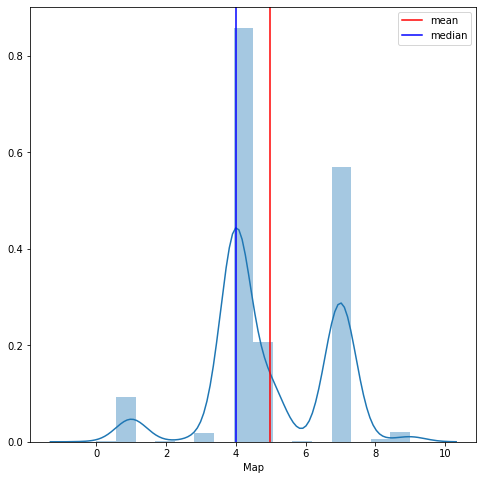

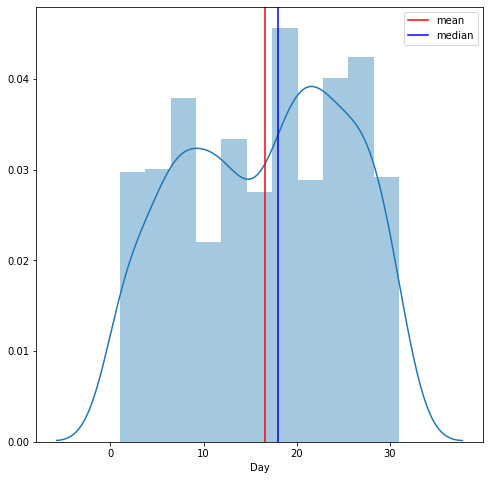

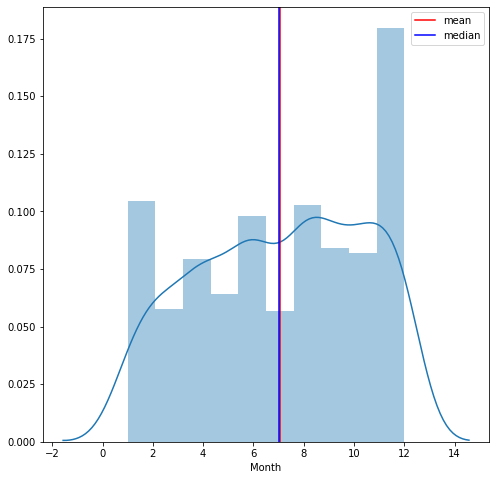

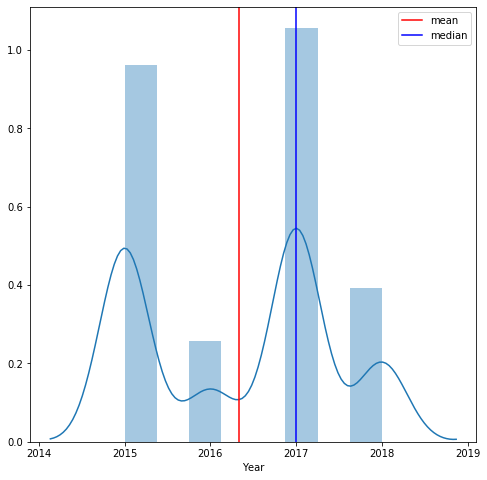

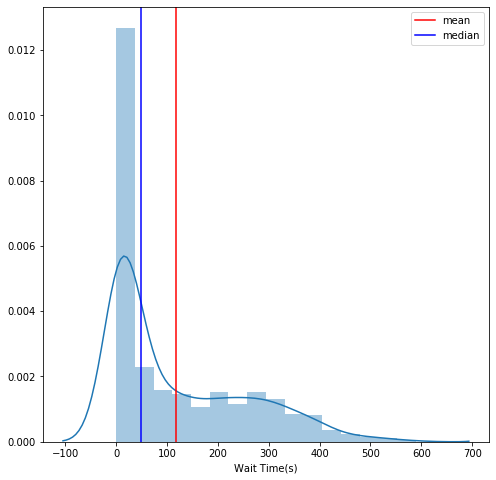

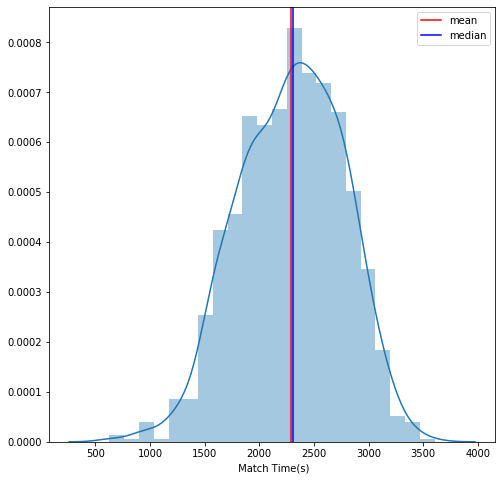

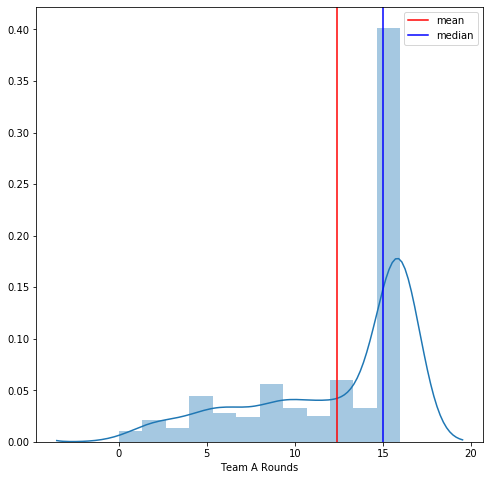

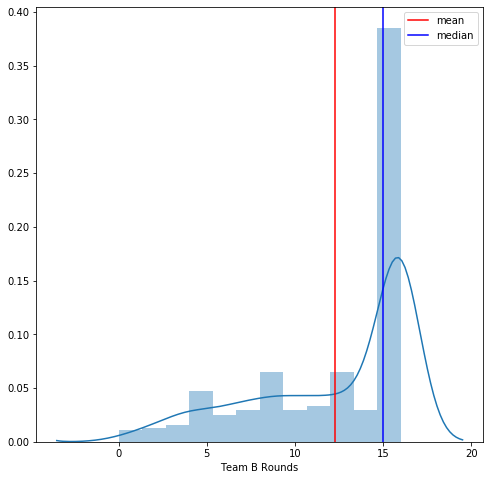

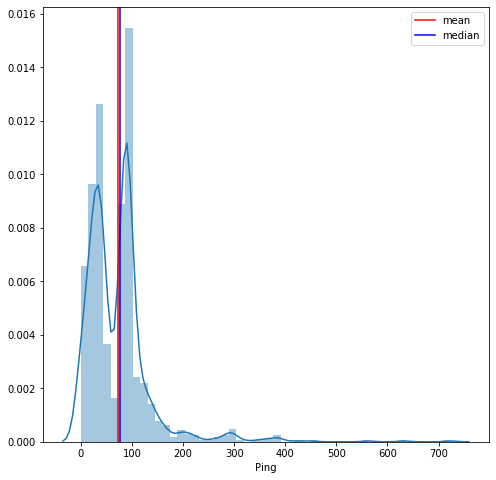

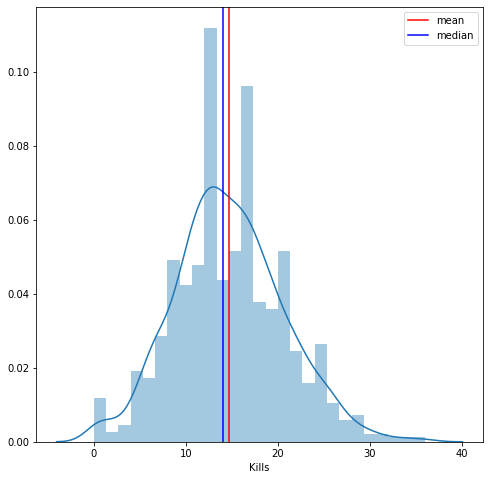

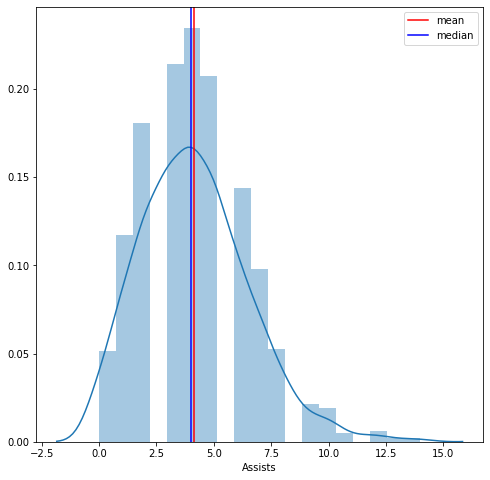

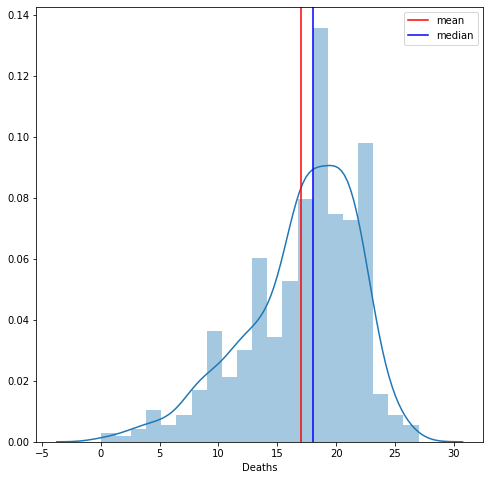

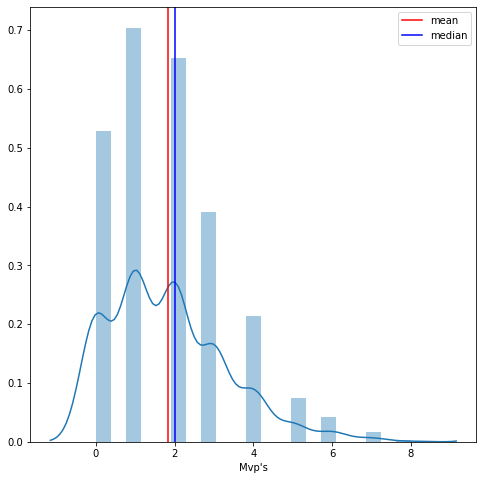

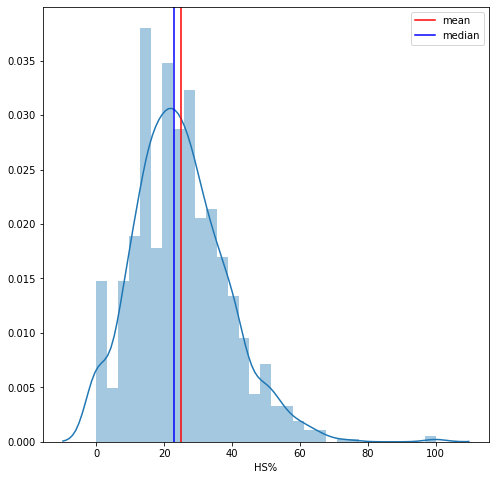

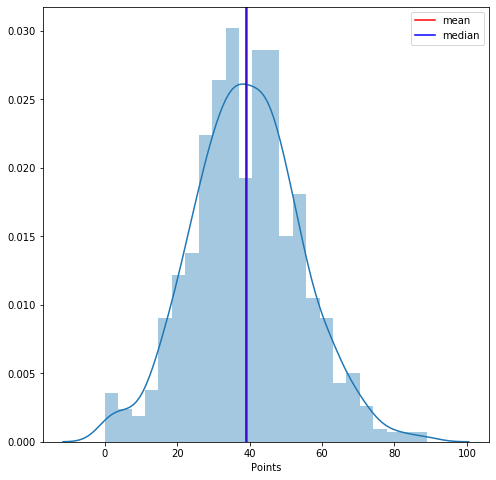

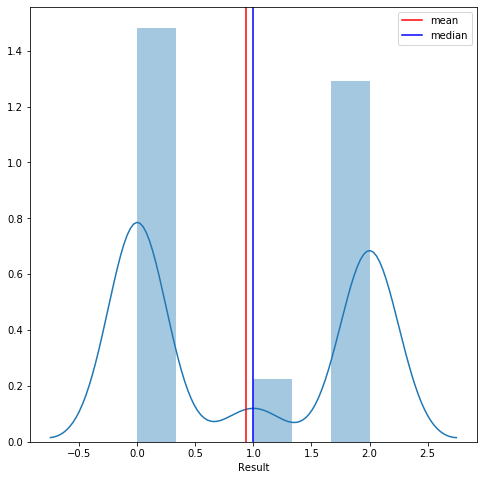

In [13]:
for col in df:
    mean = scipy.mean(df[col])
    median = scipy.median(df[col])
    plt.figure(figsize=(8,8))
    sns.distplot(df[col])
    plt.axvline(mean, color='r',label='mean')
    plt.axvline(median, color='b',label='median')
    plt.legend()

**Creating KD**

In [14]:
df['KD'] = df['Kills'] / df['Deaths']

In [15]:
df.head(3)

,Map,Day,Month,Year,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result,KD
0,7,3,8,2018,327,2906,16,13,215,17,2,21,2,5,45,2,0.809524
1,7,2,8,2018,336,2592,16,11,199,13,4,24,2,0,40,0,0.541667
2,7,31,7,2018,414,2731,16,14,85,15,3,18,3,26,37,2,0.833333


In [16]:
cat_variables = ['Map', 'Day', 'Month', 'Year']
conti_variables = ["Wait Time(s)", "Team A Rounds", "Team B Rounds",
                   "Ping", "Kills", "Assists", "Deaths", "Mvp's", "HS%", "Points", "Result"]

#### Number of observations in each categorical variable

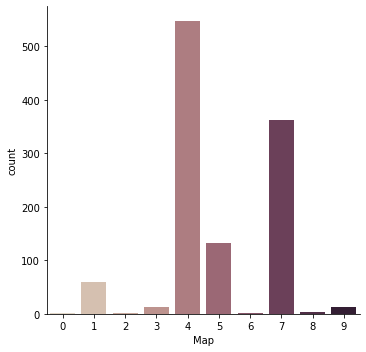

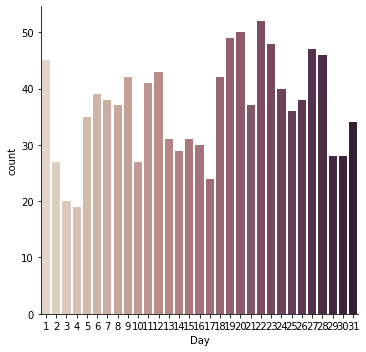

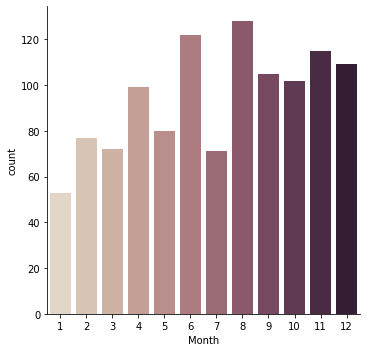

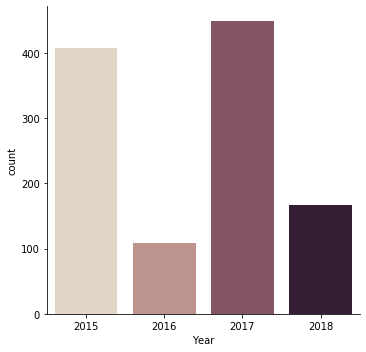

In [17]:
for var in cat_variables:
    sns.catplot(x=var, kind="count", palette="ch:.25", data=df)

### V. Bivariate/Multivariate Analysis <a id='bivariate'></a>

#### Groupby  
**To count how many items are in each group.**

Map  Result
0    0           1
1    0          29
     1           3
     2          27
2    2           1
3    0           4
     1           1
     2           7
4    0         266
     1          41
     2         240
5    0          62
     1           9
     2          61
6    0           1
7    0         184
     1          31
     2         148
8    0           3
     2           1
9    0          10
     2           3
dtype: int64
***********************
Day  Result
1    0         24
     1          5
     2         16
2    0         14
     1          4
               ..
30   1          2
     2          9
31   0         19
     1          2
     2         13
Length: 90, dtype: int64
***********************
Month  Result
1      0         23
       1          3
       2         27
2      0         37
       1          7
       2         33
3      0         43
       1          5
       2         24
4      0         57
       1          6
       2         36
5      0         35


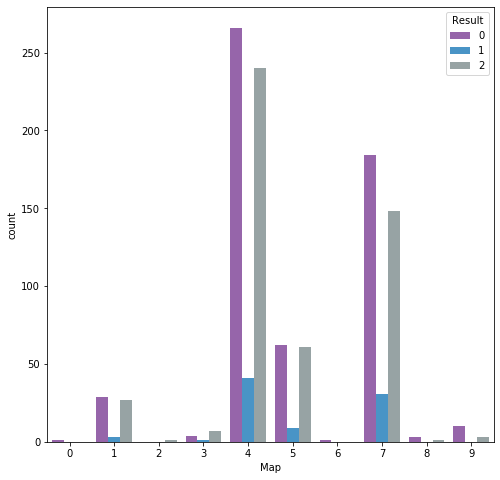

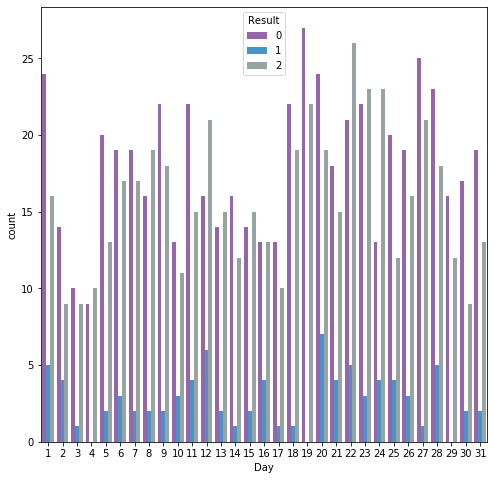

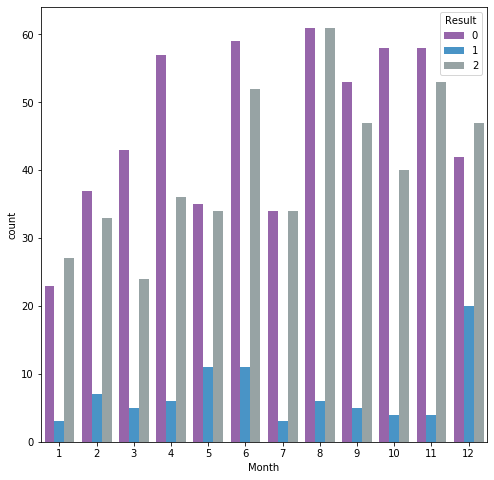

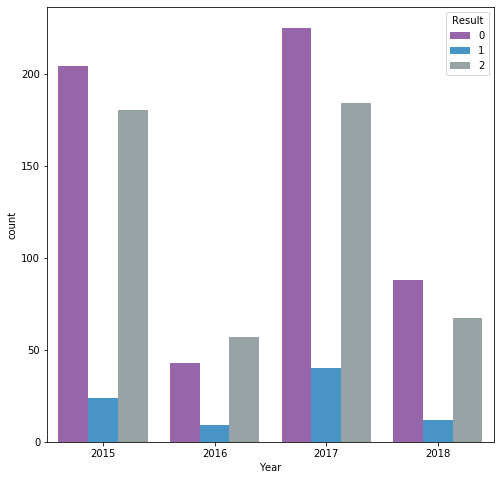

In [18]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
for var in cat_variables:
    temp = df.groupby([var,'Result']).size()
    print(temp)
    print('***********************')
    plt.figure(figsize=(8,8))
    sns.countplot(data=df,x=var,hue='Result', palette=flatui)
    

#### Correlation

In [19]:
df.corr()

,Map,Day,Month,Year,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result,KD
Map,1.000000,0.022754,0.007032,-0.061238,-0.026601,-0.002075,0.003143,-0.039485,-0.077551,0.010481,0.012715,0.003994,0.012860,-0.050844,0.026140,-0.042515,0.009474
Day,0.022754,1.000000,-0.093513,0.141338,0.123548,-0.005299,0.000159,-0.018585,0.081760,-0.073700,0.010438,-0.035384,-0.002625,0.016935,-0.054527,-0.001892,-0.029987
Month,0.007032,-0.093513,1.000000,-0.518031,-0.279086,-0.007515,0.020206,-0.006364,-0.177171,0.030545,-0.030171,0.035350,0.025859,0.036957,0.031511,0.024526,-0.008837
Year,-0.061238,0.141338,-0.518031,1.000000,0.722384,0.103838,0.009163,0.051958,0.467642,0.049954,0.013246,-0.015560,0.065940,-0.124077,0.022791,-0.029089,0.049897
Wait Time(s),-0.026601,0.123548,-0.279086,0.722384,1.000000,0.105701,0.000087,0.061210,0.360560,0.041506,0.011896,0.004182,0.047637,-0.064931,0.027221,-0.032541,0.030919
Match Time(s),-0.002075,-0.005299,-0.007515,0.103838,0.105701,1.000000,0.425267,0.419203,0.058498,0.439178,0.310732,0.619812,0.221049,0.002201,0.491566,-0.030072,-0.147363
Team A Rounds,0.003143,0.000159,0.020206,0.009163,0.000087,0.425267,1.000000,-0.580434,0.005601,0.226000,0.143679,0.268004,0.099137,-0.073557,0.241780,0.018919,-0.017956
Team B Rounds,-0.039485,-0.018585,-0.006364,0.051958,0.061210,0.419203,-0.580434,1.000000,0.046266,0.183020,0.158358,0.331202,0.090372,0.079864,0.212715,-0.053994,-0.135552
Ping,-0.077551,0.081760,-0.177171,0.467642,0.360560,0.058498,0.005601,0.046266,1.000000,0.099831,0.085185,0.126688,0.037572,-0.047676,0.094468,-0.000396,0.022431
Kills,0.010481,-0.073700,0.030545,0.049954,0.041506,0.439178,0.226000,0.183020,0.099831,1.000000,0.274691,0.264325,0.638020,-0.024651,0.954366,0.244051,0.542039


#### Scatterplot  
**To find relationship between continuous variables and target variable (Result).**

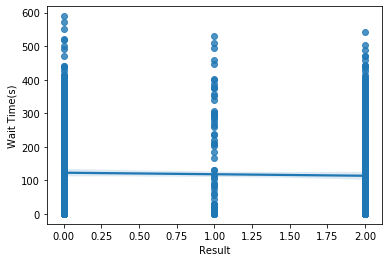

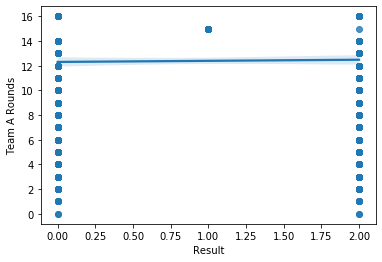

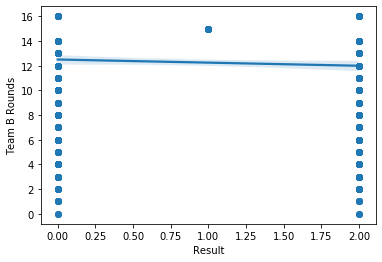

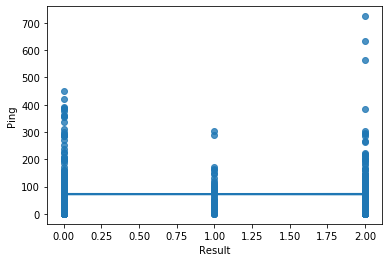

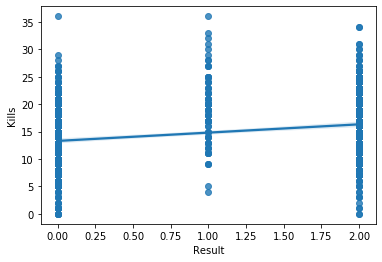

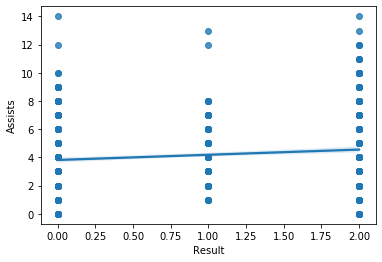

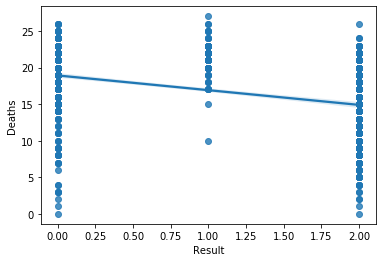

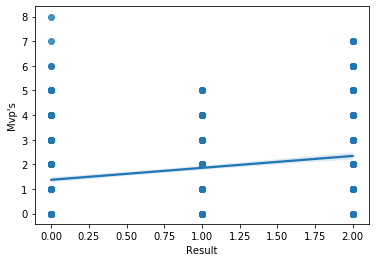

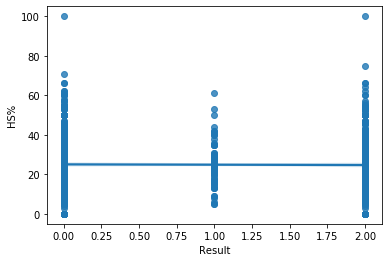

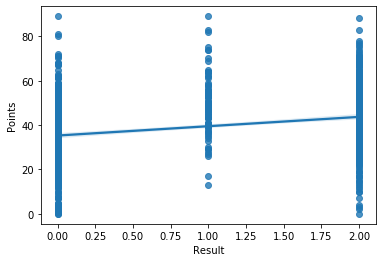

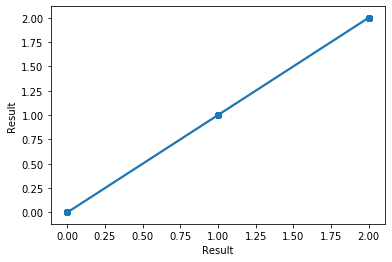

In [20]:
for var in conti_variables:
    plt.figure()
    sns.regplot(x="Result", y=var, data=df)

### VI. Answers to the Questions <a id='ans'></a>

### 1. Is there any relation between Kills and Mvp's

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [21]:
from scipy import stats

In [22]:
pearson_coef, p_value = stats.pearsonr(df["Kills"], df["Mvp's"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6380202447623676  with a P-value of P = 1.5967157921132738e-130


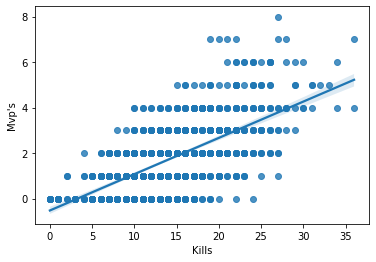

In [23]:
sns.regplot(x="Kills", y="Mvp's", data=df)

**Since Pearson Correlation Coefficient is greater than 0.5 and P-value is very small, Kills and Mvp's and positively correlated.
From Graph we can say more the number of kills more will be the Mvp's**

### 2. How Points are related to Kills.

In [24]:
pearson_coef, p_value = stats.pearsonr(df["Kills"], df['Points'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.954365897816083  with a P-value of P = 0.0


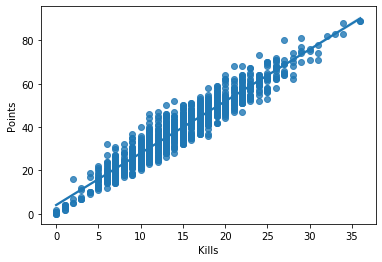

In [25]:
sns.regplot(x="Kills", y="Points", data=df)

**Since Pearson Correlation Coefficient is very close to 1 and P-value is 0, Kills and Points are highly positively correlated.
From Graph we can say more the number of kills more will be the points.**

### 3. Most played map of 2015, 2016, 2017, 2018

In [26]:
map_mapping

{'Austria': 0,
 'Cache': 1,
 'Canals': 2,
 'Cobblestone': 3,
 'Dust II': 4,
 'Inferno': 5,
 'Italy': 6,
 'Mirage': 7,
 'Nuke': 8,
 'Overpass': 9}

In [27]:
my_palette = ["#04E762", "#D3FF87", "#F5B700", "#E95C3A", "#DC0073", "#590B50","#6E46B6","#008BF8","#29814A","#9BEA38"]

Year  Map
2015  1       18
      3        6
      4      149
      5       91
      6        1
      7      133
      8        3
      9        7
2016  1        4
      3        2
      4       25
      5       26
      7       50
      8        1
      9        1
2017  0        1
      1       17
      2        1
      3        2
      4      334
      5       13
      7       78
      9        3
2018  1       20
      3        2
      4       39
      5        2
      7      102
      9        2
dtype: int64


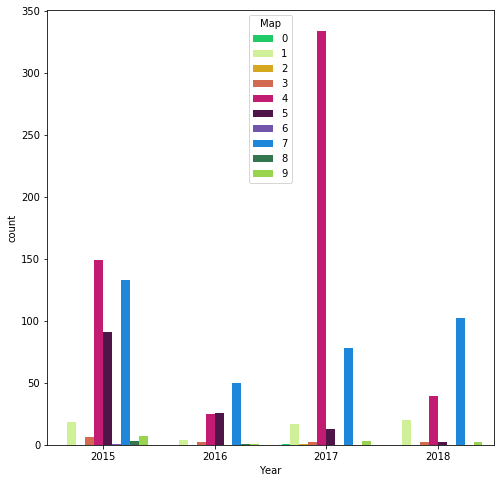

In [28]:
map_year = df.groupby(['Year', 'Map']).size()
print(map_year)

plt.figure(figsize=(8,8))
sns.countplot(data=df,x='Year',hue='Map', palette=my_palette)

**From the above plot, we have following most played maps:**  

| YEAR | MOST PLAYED MAP |
|------|-----------------|
| 2015 | Dust II         |
| 2016 | Mirage          |
| 2017 | Dust II         |
| 2018 | Mirage          |